# Import Dependencies

In [50]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
from utils.edge_extraction import *
from utils.feature_extraction import * 
from utils.fourier_transform import * 
from utils.image_conversion import * 

# Noise Reduction 

In order to decrease the noise present in certain images (whole artworks and fragments), we intend to rely on the fourier transform and process the image in the frequency domain. 


#### Gray scale problem conversion 
To compute the DFT of an image, we need to either convert it to grayscale or ensure it has only one channel.


Converting an image from RGBA to grayscale can be convenient but comes at a cost — the loss of RGB color and alpha channel data. This can be troublesome if we later rely on that information for specific purposes.

Alternatively, we can split the image into its primary color channels and process each channel separately in the frequency domain, excluding the alpha channel. After filtering, we can reconstruct the new filtered image by recombining these processed channels.

To enhance the details to facilitate the extraction of features in subsequent steps we can apply contrast enhancing techniques. 


In [51]:
# read the image as png -> 4 channels (blue, green, red, alpha)
image = cv.imread('data/5.36.6.png', cv.IMREAD_UNCHANGED) 

# we need to preserve the information about the alpha channel (mainly for visualization and edge extraction purposes) 
b, g, r, a = cv.split(image)

## Gray Scale Approach

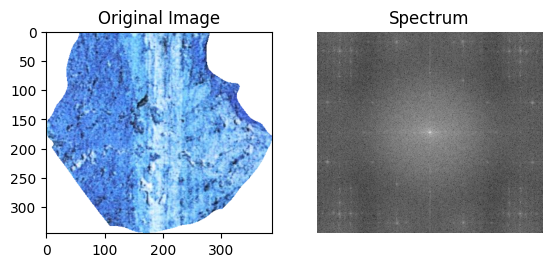

In [52]:
# convert image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
# compute the DFT of the gray scale image
gray_image_spectrum = calculate_dft2(gray_image)
# plot the original image and the current fourier spectrum 
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plot_2d_ft_spectrum(gray_image_spectrum, title='Spectrum')
plt.show()

### Applying Low Pass Filter

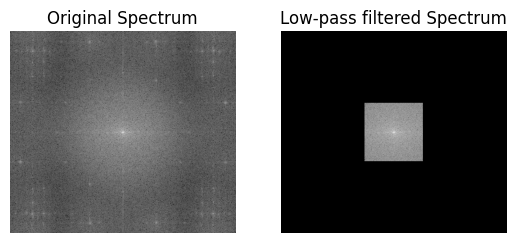

In [53]:
low_pass_gray_spectrum = apply_2d_low_pass_filter(gray_image_spectrum, threshold=50)

plt.subplot(1, 2, 1)
plot_2d_ft_spectrum(gray_image_spectrum, title='Original Spectrum', show=False)
plt.subplot(1, 2, 2)
plot_2d_ft_spectrum(low_pass_gray_spectrum, title='Low-pass filtered Spectrum', show=False)
plt.show()

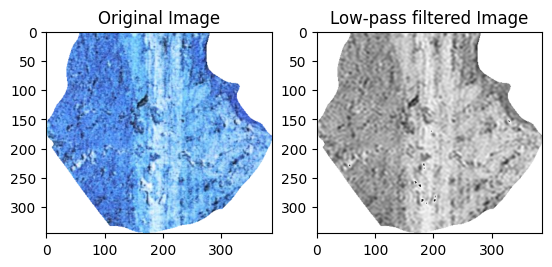

In [54]:
low_pass_gray_image = calculate_idft2(low_pass_gray_spectrum)
# simulate grayscale to RGB conversion by repeating the gray information and concatenating the alpha channel 
low_pass_gray_image = np.dstack((low_pass_gray_image, low_pass_gray_image, low_pass_gray_image, a)).astype(np.uint8)

plt.set_cmap(cmap='gray')
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_gray_image)
plt.title('Low-pass filtered Image')
plt.show()

### Applying High Pass Filter

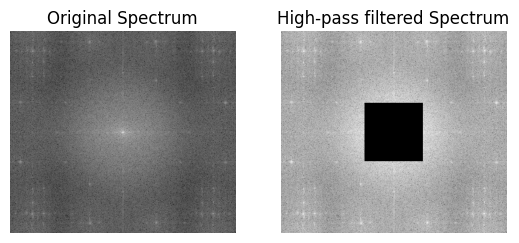

In [55]:
high_pass_gray_spectrum = apply_2d_high_pass_filter(gray_image_spectrum, threshold=50)

plt.subplot(1, 2, 1)
plot_2d_ft_spectrum(gray_image_spectrum, title='Original Spectrum', show=False)
plt.subplot(1, 2, 2)
plot_2d_ft_spectrum(high_pass_gray_spectrum, title='High-pass filtered Spectrum', show=False)
plt.show()

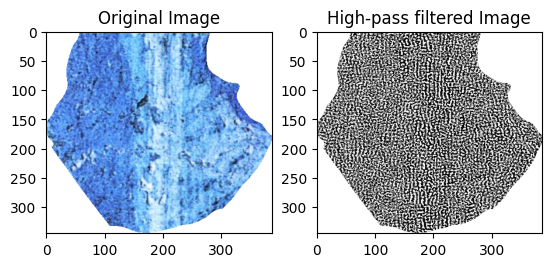

In [56]:
high_pass_gray_image = calculate_idft2(high_pass_gray_spectrum)
# simulate grayscale to RGB conversion by repeating the gray information and concatenating the alpha channel 
high_pass_gray_image = np.dstack((high_pass_gray_image, high_pass_gray_image, high_pass_gray_image, a)).astype(np.uint8)

plt.set_cmap(cmap='gray')
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(high_pass_gray_image)
plt.title('High-pass filtered Image')
plt.show()

### Applying Band Pass Filter

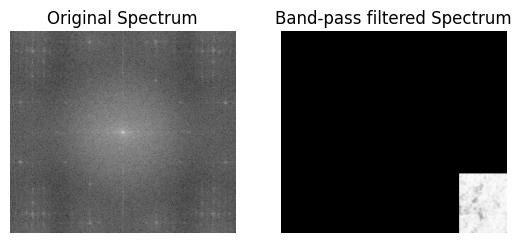

In [57]:
band_pass_gray_spectrum = apply_2d_band_pass_filter(gray_image, lower_threshold=50, upper_threshold=200)

plt.subplot(1, 2, 1)
plot_2d_ft_spectrum(gray_image_spectrum, title='Original Spectrum', show=False)
plt.subplot(1, 2, 2)
plot_2d_ft_spectrum(band_pass_gray_spectrum, title='Band-pass filtered Spectrum', show=False)
plt.show()

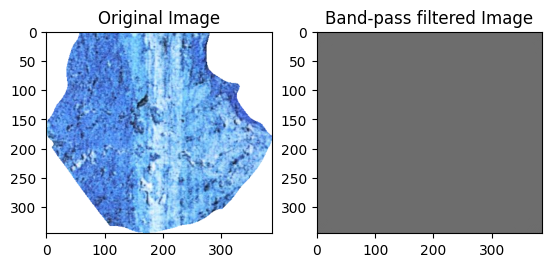

In [58]:
band_pass_gray_image = calculate_idft2(band_pass_gray_spectrum)
# simulate grayscale to RGB conversion by repeating the gray information and concatenating the alpha channel 
high_pass_gray_image = np.dstack((band_pass_gray_image, band_pass_gray_image, band_pass_gray_image, a)).astype(np.uint8)

plt.set_cmap(cmap='gray')
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(band_pass_gray_image)
plt.title('Band-pass filtered Image')
plt.show()

### Low-pass vs High-pass vs Band-pass

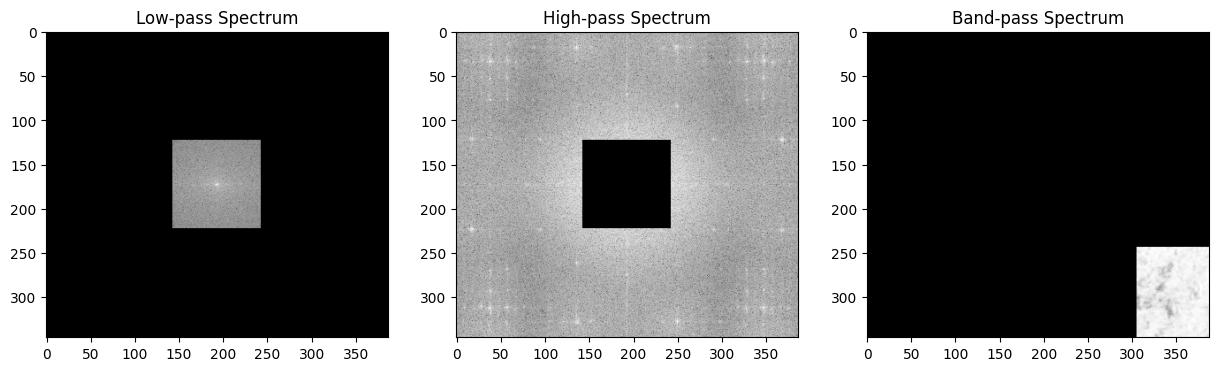

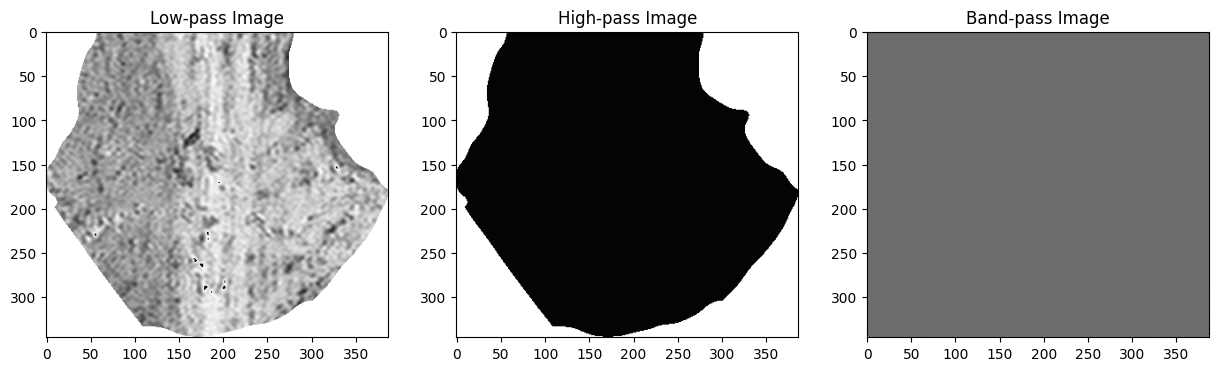

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
spectra = [low_pass_gray_spectrum, high_pass_gray_spectrum, band_pass_gray_spectrum]
titles = ["Low-pass Spectrum", "High-pass Spectrum", "Band-pass Spectrum"]

for i, ax in enumerate(axes):
    ax.imshow(20 * np.log(np.abs(spectra[i]) + 1))
    ax.set_title(titles[i])

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
images = [low_pass_gray_image, high_pass_gray_image, band_pass_gray_image]
titles = ["Low-pass Image", "High-pass Image", "Band-pass Image"]

for i, ax in enumerate(axes):
    ax.imshow(images[i])  # Adjust the colormap if images are not grayscale
    ax.set_title(titles[i])
    
plt.show()

## RGB Splitting Approach

In [60]:
blue_spectrum = calculate_dft2(b)

green_spectrum = calculate_dft2(g)

red_spectrum = calculate_dft2(r)

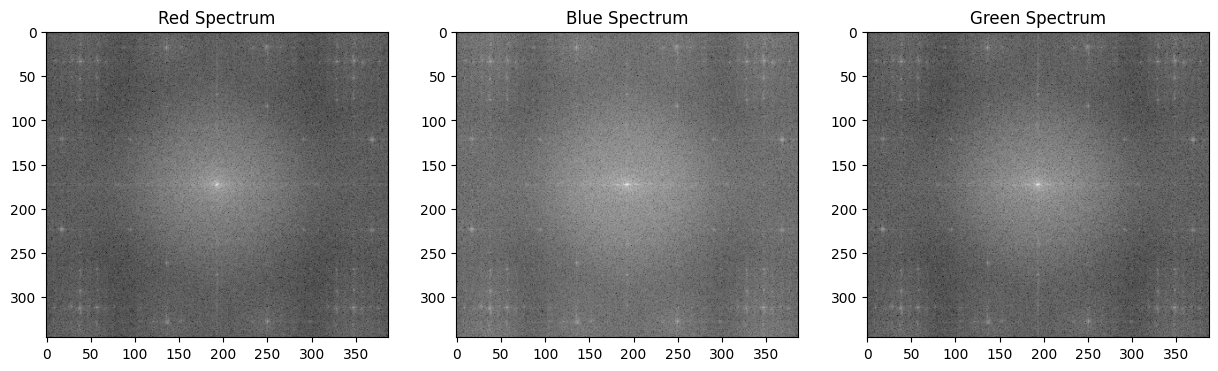

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
spectra = [red_spectrum, blue_spectrum, green_spectrum]
titles = ["Red Spectrum", "Blue Spectrum", "Green Spectrum"]

for i, ax in enumerate(axes):
    ax.imshow(20 * np.log(np.abs(spectra[i]) + 1))
    ax.set_title(titles[i])

### Applying Low Pass Filter

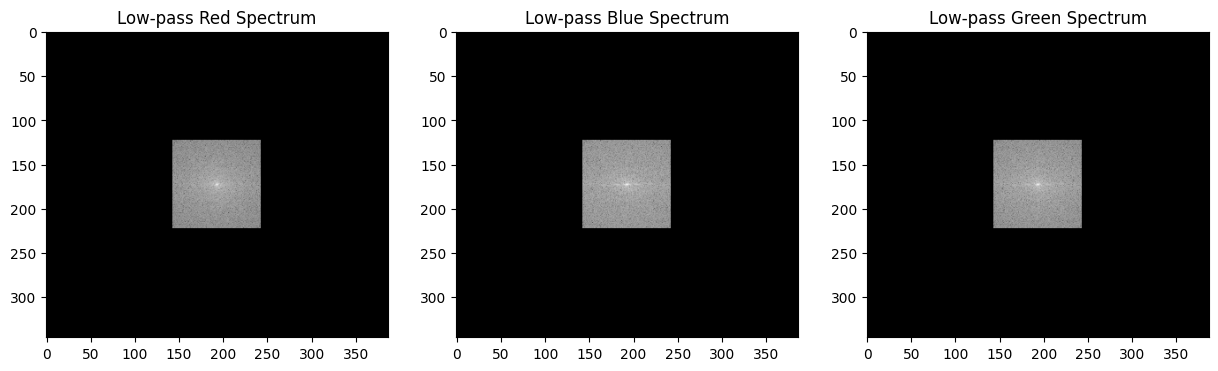

In [62]:
low_pass_blue_spectrum = apply_2d_low_pass_filter(blue_spectrum, threshold=50)

low_pass_green_spectrum = apply_2d_low_pass_filter(green_spectrum, threshold=50)

low_pass_red_spectrum = apply_2d_low_pass_filter(red_spectrum, threshold=50)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
spectra = [low_pass_red_spectrum, low_pass_blue_spectrum, low_pass_green_spectrum]
titles = ["Low-pass Red Spectrum", "Low-pass Blue Spectrum", "Low-pass Green Spectrum"]

for i, ax in enumerate(axes):
    ax.imshow(20 * np.log(np.abs(spectra[i]) + 1))
    ax.set_title(titles[i])

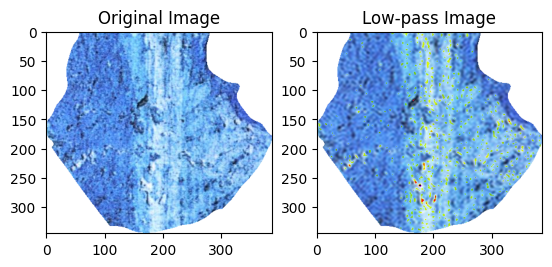

In [63]:
low_pass_blue_image = calculate_idft2(low_pass_blue_spectrum).astype(np.uint8)
low_pass_green_image = calculate_idft2(low_pass_green_spectrum).astype(np.uint8)
low_pass_red_image = calculate_idft2(low_pass_red_spectrum).astype(np.uint8)

low_pass_image = cv.merge((low_pass_blue_image, low_pass_green_image, low_pass_red_image, a)).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image)
plt.title('Low-pass Image')
plt.show()

### Applying High Pass Filter

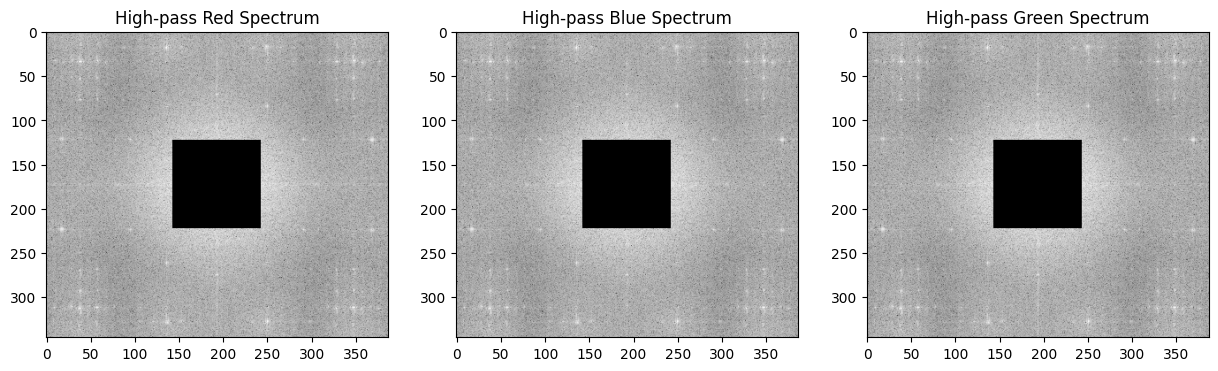

In [64]:
high_pass_blue_spectrum = apply_2d_high_pass_filter(blue_spectrum, threshold=50)

high_pass_green_spectrum = apply_2d_high_pass_filter(green_spectrum, threshold=50)

high_pass_red_spectrum = apply_2d_high_pass_filter(red_spectrum, threshold=50)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
spectra = [high_pass_red_spectrum, high_pass_blue_spectrum, high_pass_green_spectrum]
titles = ["High-pass Red Spectrum", "High-pass Blue Spectrum", "High-pass Green Spectrum"]

plt.set_cmap(cmap='gray')

for i, ax in enumerate(axes):
    ax.imshow(20 * np.log(np.abs(spectra[i]) + 1))
    ax.set_title(titles[i])

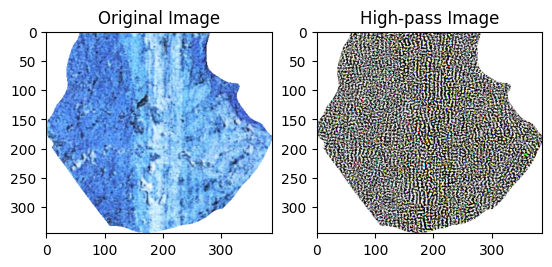

In [65]:
high_pass_blue_image = calculate_idft2(high_pass_blue_spectrum).astype(np.uint8)
high_pass_green_image = calculate_idft2(high_pass_green_spectrum).astype(np.uint8)
high_pass_red_image = calculate_idft2(high_pass_red_spectrum).astype(np.uint8)

high_pass_image = cv.merge((high_pass_blue_image, high_pass_green_image, high_pass_red_image, a)).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(high_pass_image)
plt.title('High-pass Image')
plt.show()

### Applying Band Pass Filter

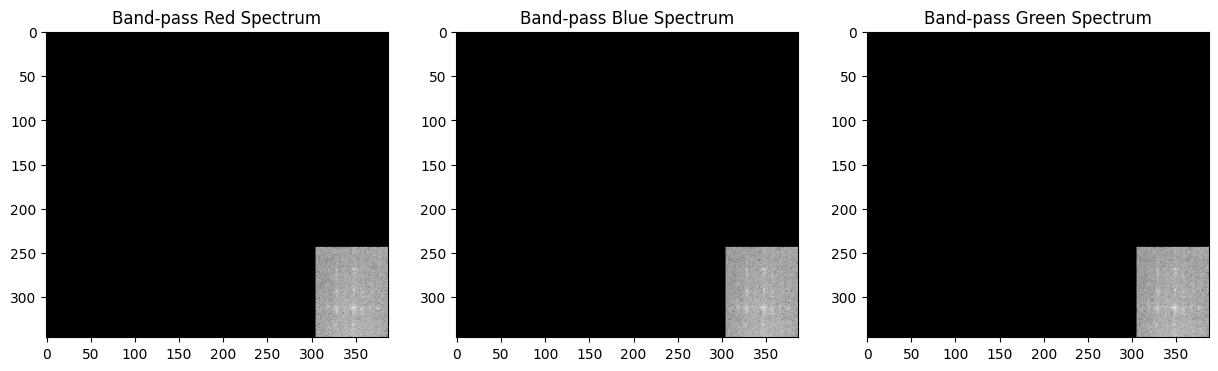

In [66]:
band_pass_blue_spectrum = apply_2d_band_pass_filter(blue_spectrum, lower_threshold=50, upper_threshold=200)

band_pass_green_spectrum = apply_2d_band_pass_filter(green_spectrum, lower_threshold=50, upper_threshold=200)

band_pass_red_spectrum = apply_2d_band_pass_filter(red_spectrum, lower_threshold=50, upper_threshold=200)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
spectra = [band_pass_red_spectrum, band_pass_blue_spectrum, band_pass_green_spectrum]
titles = ["Band-pass Red Spectrum", "Band-pass Blue Spectrum", "Band-pass Green Spectrum"]

plt.set_cmap(cmap='gray')

for i, ax in enumerate(axes):
    ax.imshow(20 * np.log(np.abs(spectra[i]) + 1))
    ax.set_title(titles[i])

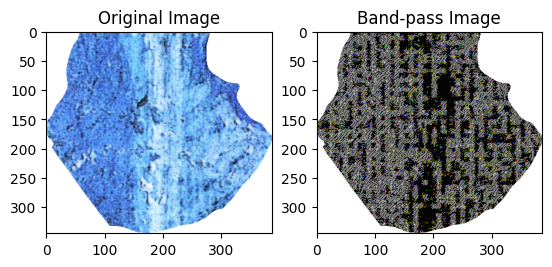

In [67]:
band_pass_blue_image = calculate_idft2(band_pass_blue_spectrum).astype(np.uint8)
band_pass_green_image = calculate_idft2(band_pass_green_spectrum).astype(np.uint8)
band_pass_red_image = calculate_idft2(band_pass_red_spectrum).astype(np.uint8)

band_pass_image = cv.merge((band_pass_blue_image, band_pass_green_image, band_pass_red_image, a)).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(band_pass_image)
plt.title('Band-pass Image')
plt.show()

## Edge Extraction 

We are currently interested only in the shape of the fragment and a variable region near the edges. In order to extract those, we leverage the alpha channel: if a pixel $x$ has an immediate neighbour pixel $x_{neigh}$ that has the alpha channel set to $0$, then $x$ is an edge pixel. 

From this point on, we extract a working region by considering pixels that are in a certain threshold from the contour. 

CPU times: user 992 ms, sys: 2.37 ms, total: 995 ms
Wall time: 679 ms


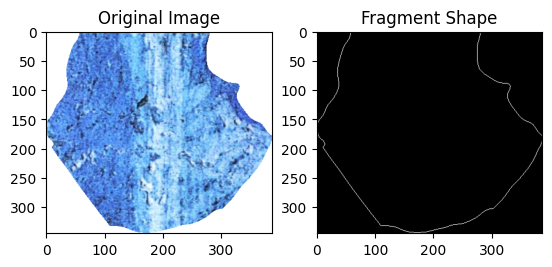

In [68]:
%time fragment_shape = alpha_edge_detector(image)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(fragment_shape)
plt.title('Fragment Shape')
plt.show()

CPU times: user 2.76 s, sys: 8.61 ms, total: 2.77 s
Wall time: 2.43 s


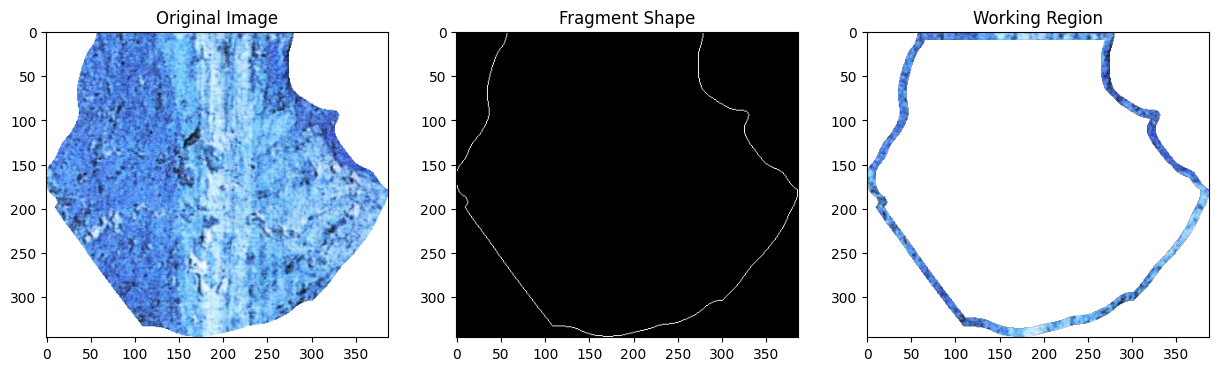

In [69]:
# extracting the working region 
%time working_region = extract_interpolation_region(image, threshold=10)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
images = [image, fragment_shape, working_region]
titles = ["Original Image", "Fragment Shape", "Working Region"]

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(titles[i])